# What is Dask? 

<div>
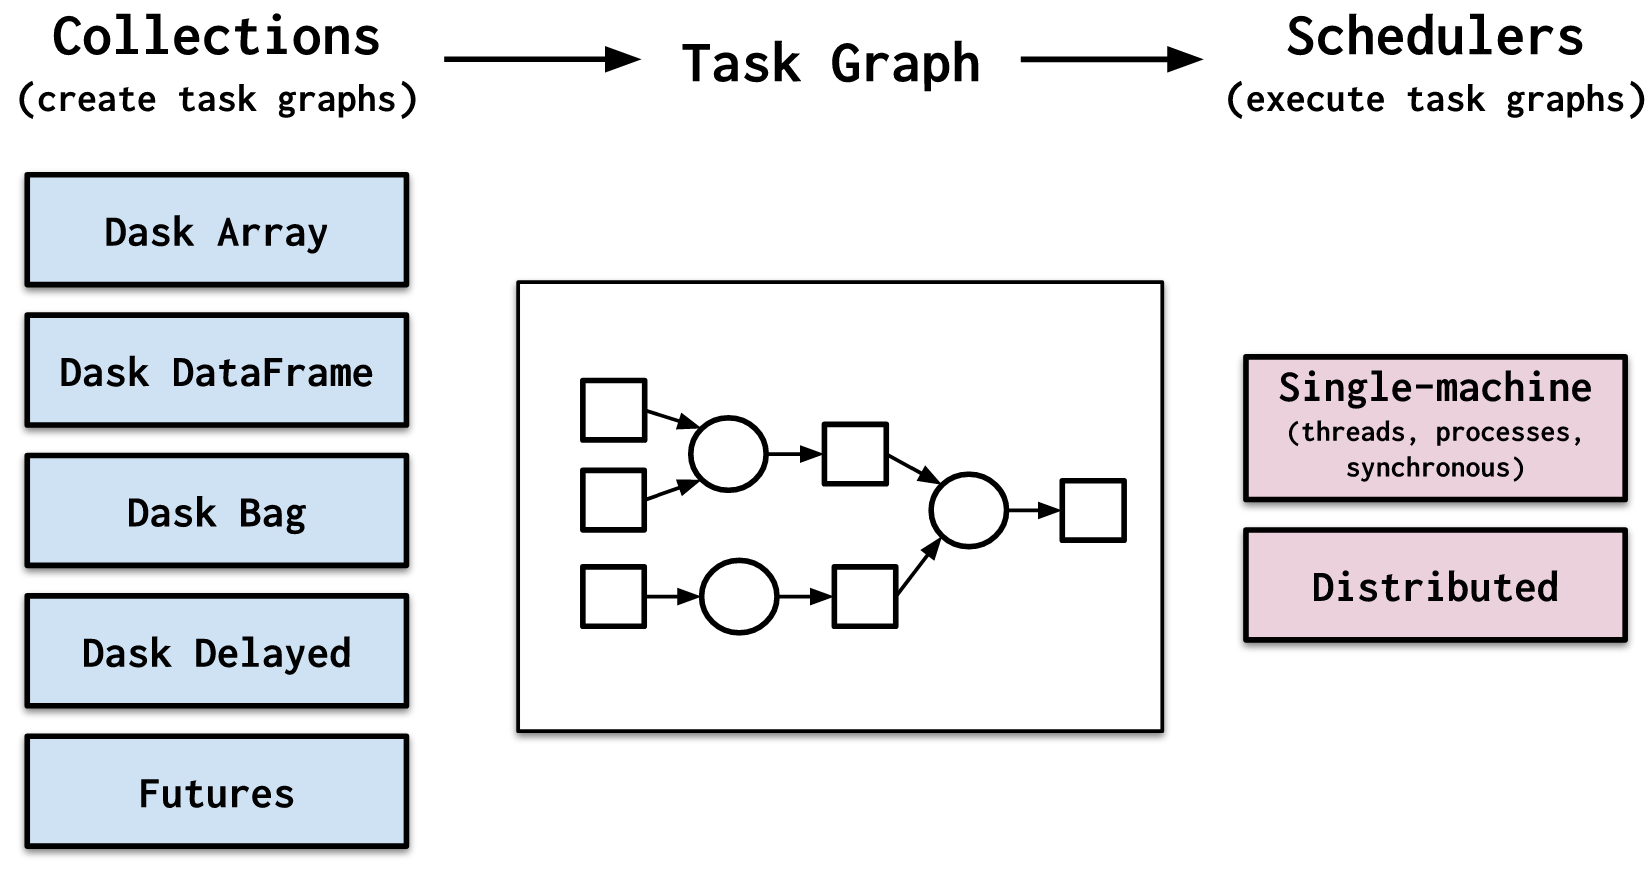
</div>

Here are the basic aspects of Dask, according to dask's package maintainers:
- process data that doesn't fit into memory by breaking it into blocks and specifying task chains
- parallelize execution of tasks across cores and even nodes of a cluster
- move computation to the data rather than the other way around, to minimize communication overhead




Simplest dask example

Let us first open a single high-res CESM model output file, containing 1 time step, using xarray. Notice the additional chunks argument to the open_dataset function  

In [1]:
import xarray as xr
import time
%matplotlib inline

prefix='/scratch/training/CESM_post/datasets/hires'
file = 'B.E.13.B1950TRC5.ne120_t12.cesm-ihesp-1950-2050.013.pop.h.2020-01.nc'
infile = prefix+'/'+file

ds = xr.open_dataset(infile, chunks={'nlat':400,'nlon':600})

ds

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 2400, nlon: 3600, time: 1, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time                (time) object 2020-01-17 00:00:00
  * z_t                 (z_t) float32 500.0 1500.0 ... 562499.06 587499.06
  * z_t_150m            (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w                 (z_w) float32 0.0 1000.0 2000.0 ... 549999.06 574999.06
  * z_w_top             (z_w_top) float32 0.0 1000.0 ... 549999.06 574999.06
  * z_w_bot             (z_w_bot) float32 1000.0 2000.0 ... 574999.06 599999.06
    ULONG               (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    ULAT                (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    TLONG               (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    TLAT                (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound          (time, d2) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    dz                  (z_t) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    dzw                 (z_w) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    KMT                 (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    KMU                 (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    REGION_MASK         (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    UAREA               (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    TAREA               (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    HU                  (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    HT                  (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    DXU                 (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    DYU                 (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    DXT                 (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    DYT                 (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    HTN                 (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    HTE                 (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    HUS                 (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    HUW                 (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    ANGLE               (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    ANGLET              (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    days_in_norm_year   timedelta64[ns] ...
    grav                float64 ...
    omega               float64 ...
    radius              float64 ...
    cp_sw               float64 ...
    sound               float64 ...
    vonkar              float64 ...
    cp_air              float64 ...
    rho_air             float64 ...
    rho_sw              float64 ...
    rho_fw              float64 ...
    stefan_boltzmann    float64 ...
    latent_heat_vapor   float64 ...
    latent_heat_fusion  float64 ...
    ocn_ref_salinity    float64 ...
    sea_ice_salinity    float64 ...
    T0_Kelvin           float64 ...
    salt_to_ppt         float64 ...
    ppt_to_salt         float64 ...
    mass_to_Sv          float64 ...
    heat_to_PW          float64 ...
    salt_to_Svppt       float64 ...
    salt_to_mmday       float64 ...
    momentum_factor     float64 ...
    hflux_factor        float64 ...
    fwflux_factor       float64 ...
    salinity_factor     float64 ...
    sflux_factor        float64 ...
    nsurface_t          float64 ...
    nsurface_u          float64 ...
 

Let's look at the structure of the TEMP field

In [2]:
ds.TEMP

<xarray.DataArray 'TEMP' (time: 1, z_t: 62, nlat: 2400, nlon: 3600)>
dask.array<open_dataset-501dbdc1a28c86737f33d80f3d94fe03TEMP, shape=(1, 62, 2400, 3600), dtype=float32, chunksize=(1, 62, 400, 600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2020-01-17 00:00:00
  * z_t      (z_t) float32 500.0 1500.0 2500.0 ... 537500.0 562499.06 587499.06
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(400, 600), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Potential Temperature
    units:         degC
    grid_loc:      3111
    cell_methods:  time: mean

Notice how different this *temp* field is compared to the previous method. The data in ds.temp is no longer a simple numpy.ndarray, but it is instead split into 36 chunks of size (1, 62, 400, 600) each. When using dask, the open_dataset operation does not immediately load data from the file into memory. Instead, dask delays the loading of data to when absolutely necessary. More on this later.

In [4]:
ds.TEMP.nbytes/1e9

2.14272

## Lazy loading and basic Parallelism

The most important aspect of this *temp* field is that much of the data that xarray 'sees' at this point only exists on disk storage and is not actually loaded into the memory (RAM). At this stage, xarray/dask is only aware of a basic amount of information enough to start performing tasks on the dataset. Dask automatically loads data according to the chunk size from disk storage into RAM as required for each computation. This is known as *lazy loading*. This is unlike the previous method (without the explicit chunks argument), which would load the entire file(s) into memory. 

**A huge advantage of lazy loading is that we can potentially invoke computations on entire high-resolution datasets that far exceed the amount of memory available to us.**

In [14]:
%%time
average_ds=ds.TEMP.mean()

CPU times: user 8 ms, sys: 1 ms, total: 9 ms
Wall time: 8.35 ms


Note how the above operation finishes in the order of milliseconds. However, the above command did not actually compute the mean. It has only generated the task graphs at this point. To actually force the computation, do

In [15]:
%%time
average_ds.compute()
ds.close()

CPU times: user 17.9 s, sys: 4.34 s, total: 22.2 s
Wall time: 17.1 s


<xarray.DataArray 'TEMP' ()>
array(4.137655, dtype=float32)

node /scratch/training/CESM_post/conda/envs/training/lib/python3.7/site-packages/jupyterlab/staging/yarn.js install --non-interactiveThe *compute()* operation forces dask to compute all the pending tasks and return the result to the jupyter notebook or python script from which it is called. In this case, the memory available to the notebook and the dask workers are exactly the same. We will also see examples where the dask workers are running on vasly bigger computational resources compared to the jupyter notebook. In such cases, calling compute() without careful forethough could potentially lead to the notebook running out of memory and crashing. 

When ds.mean is called, dask first partitions this mean operation into a series of small tasks to operate on each chunk. It will be useful to take a look at the task graph generated by dask. But before we do, let's reopen the dataset with a fewer number of chunks, so that it's easier to visualize. We just have 4 chunks in the temperature field  

In [29]:
ds = xr.open_dataset(infile, chunks={'nlat':1200,'nlon':1800})
ds.TEMP

<xarray.DataArray 'TEMP' (time: 1, z_t: 62, nlat: 2400, nlon: 3600)>
dask.array<open_dataset-e788495fa1cee871d6c7d232e7ffb4a1TEMP, shape=(1, 62, 2400, 3600), dtype=float32, chunksize=(1, 62, 1200, 1800), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2020-01-17 00:00:00
  * z_t      (z_t) float32 500.0 1500.0 2500.0 ... 537500.0 562499.06 587499.06
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(1200, 1800), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(1200, 1800), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(1200, 1800), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(1200, 1800), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Potential Temperature
    units:         degC
    grid_loc:      3111
    cell_methods:  time: mean

Below is an example of a dask graph generated when we call the mean operation on the temperature field in the dataset.

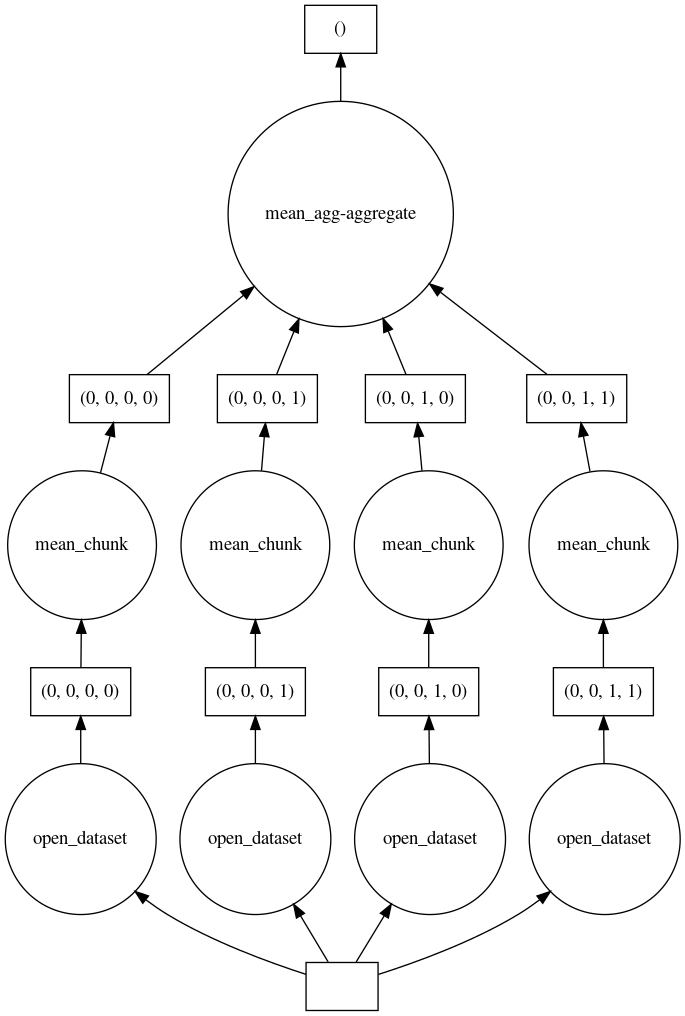

In [30]:
import dask
dask.visualize(ds.TEMP.mean())
ds.close()

As we saw previously, there are 4 chunks in the dataset we opened. Dask loads each chunk into memory, and calls the mean_chunk function to generate the required sum and number of elements in the chunk, and aggregates the values in the mean_agg step. 

During the compute() operation, the dask scheduler basically assigns or schedules each task in the graph (circle) to operate on data (rectangle). The scheduler optimally assigns tasks to processors that already have the respective chunk in memory. When it runs out of new chunks to process, dask loads more chunks into memory through open_dataset. Since dask assigns these tasks to all available processors by default, this means that operation we just executed is **inherently parallel**.

## Dask default single-machine scheduler

When the compute() function is called, dask uses a default single-machine scheduler to provide task parallelism. Specifically, dask runs the mean function on a single process with multiple-threads, which is equivalent to saying more exlicitly average_ds.compute(scheduler='threads'). The work among the 4 chunks in the previous step would be distributed among 4 threads on a single process. 

Dask can also spread work among different processes instead of threads, by using average_ds.compute(scheduler='processes'). This can be advantageous in certain situations. See: https://docs.dask.org/en/latest/setup/single-machine.html

Finally, you can also force dask to run the entire work on a single thread by using average_ds.compute(scheduler='single-threaded'). For the previous example, a single thread would execute the entire task graph by looping over the graph.

In [31]:
#average_ds.compute(scheduler='processes')
#average_ds.compute(scheduler='single-threaded').

## Dask distributed scheduler - single machine

Dask also comes with a much more sophisticated distributed scheduler, that has been designed to scale across hundreds of compute nodes (and thousands of cores). For several reasons, it is also preferable to use this scheduler for a single machine. See: https://docs.dask.org/en/latest/setup/single-distributed.html. Most importantly, it comes with a dashboard that helps diagnose problems with performance. 

To start the distributed scheduler, we can simply do 

In [1]:
from dask.distributed import Client
client = Client(n_workers=2,threads_per_worker=2,memory_limit='2GB')
client

Client Scheduler: tcp://127.0.0.1:39319 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 4 Memory: 3.73 GiB


With the client = Client() statement, the distributed scheduler has registered itself as the default Dask scheduler. We see that the above statement has created a Dask "cluster" with 2 workers (processes, in this case) each containing 2 threads, and 2GB of memory. 

We will do an mean computation just to take a look at the dashboard. 

In [40]:
ds = xr.open_dataset(infile, chunks={'nlat':400,'nlon':600})
ds.SALT.mean().compute()

<xarray.DataArray 'SALT' ()>
array(-374.684, dtype=float32)

 The dashboard will look something like this
  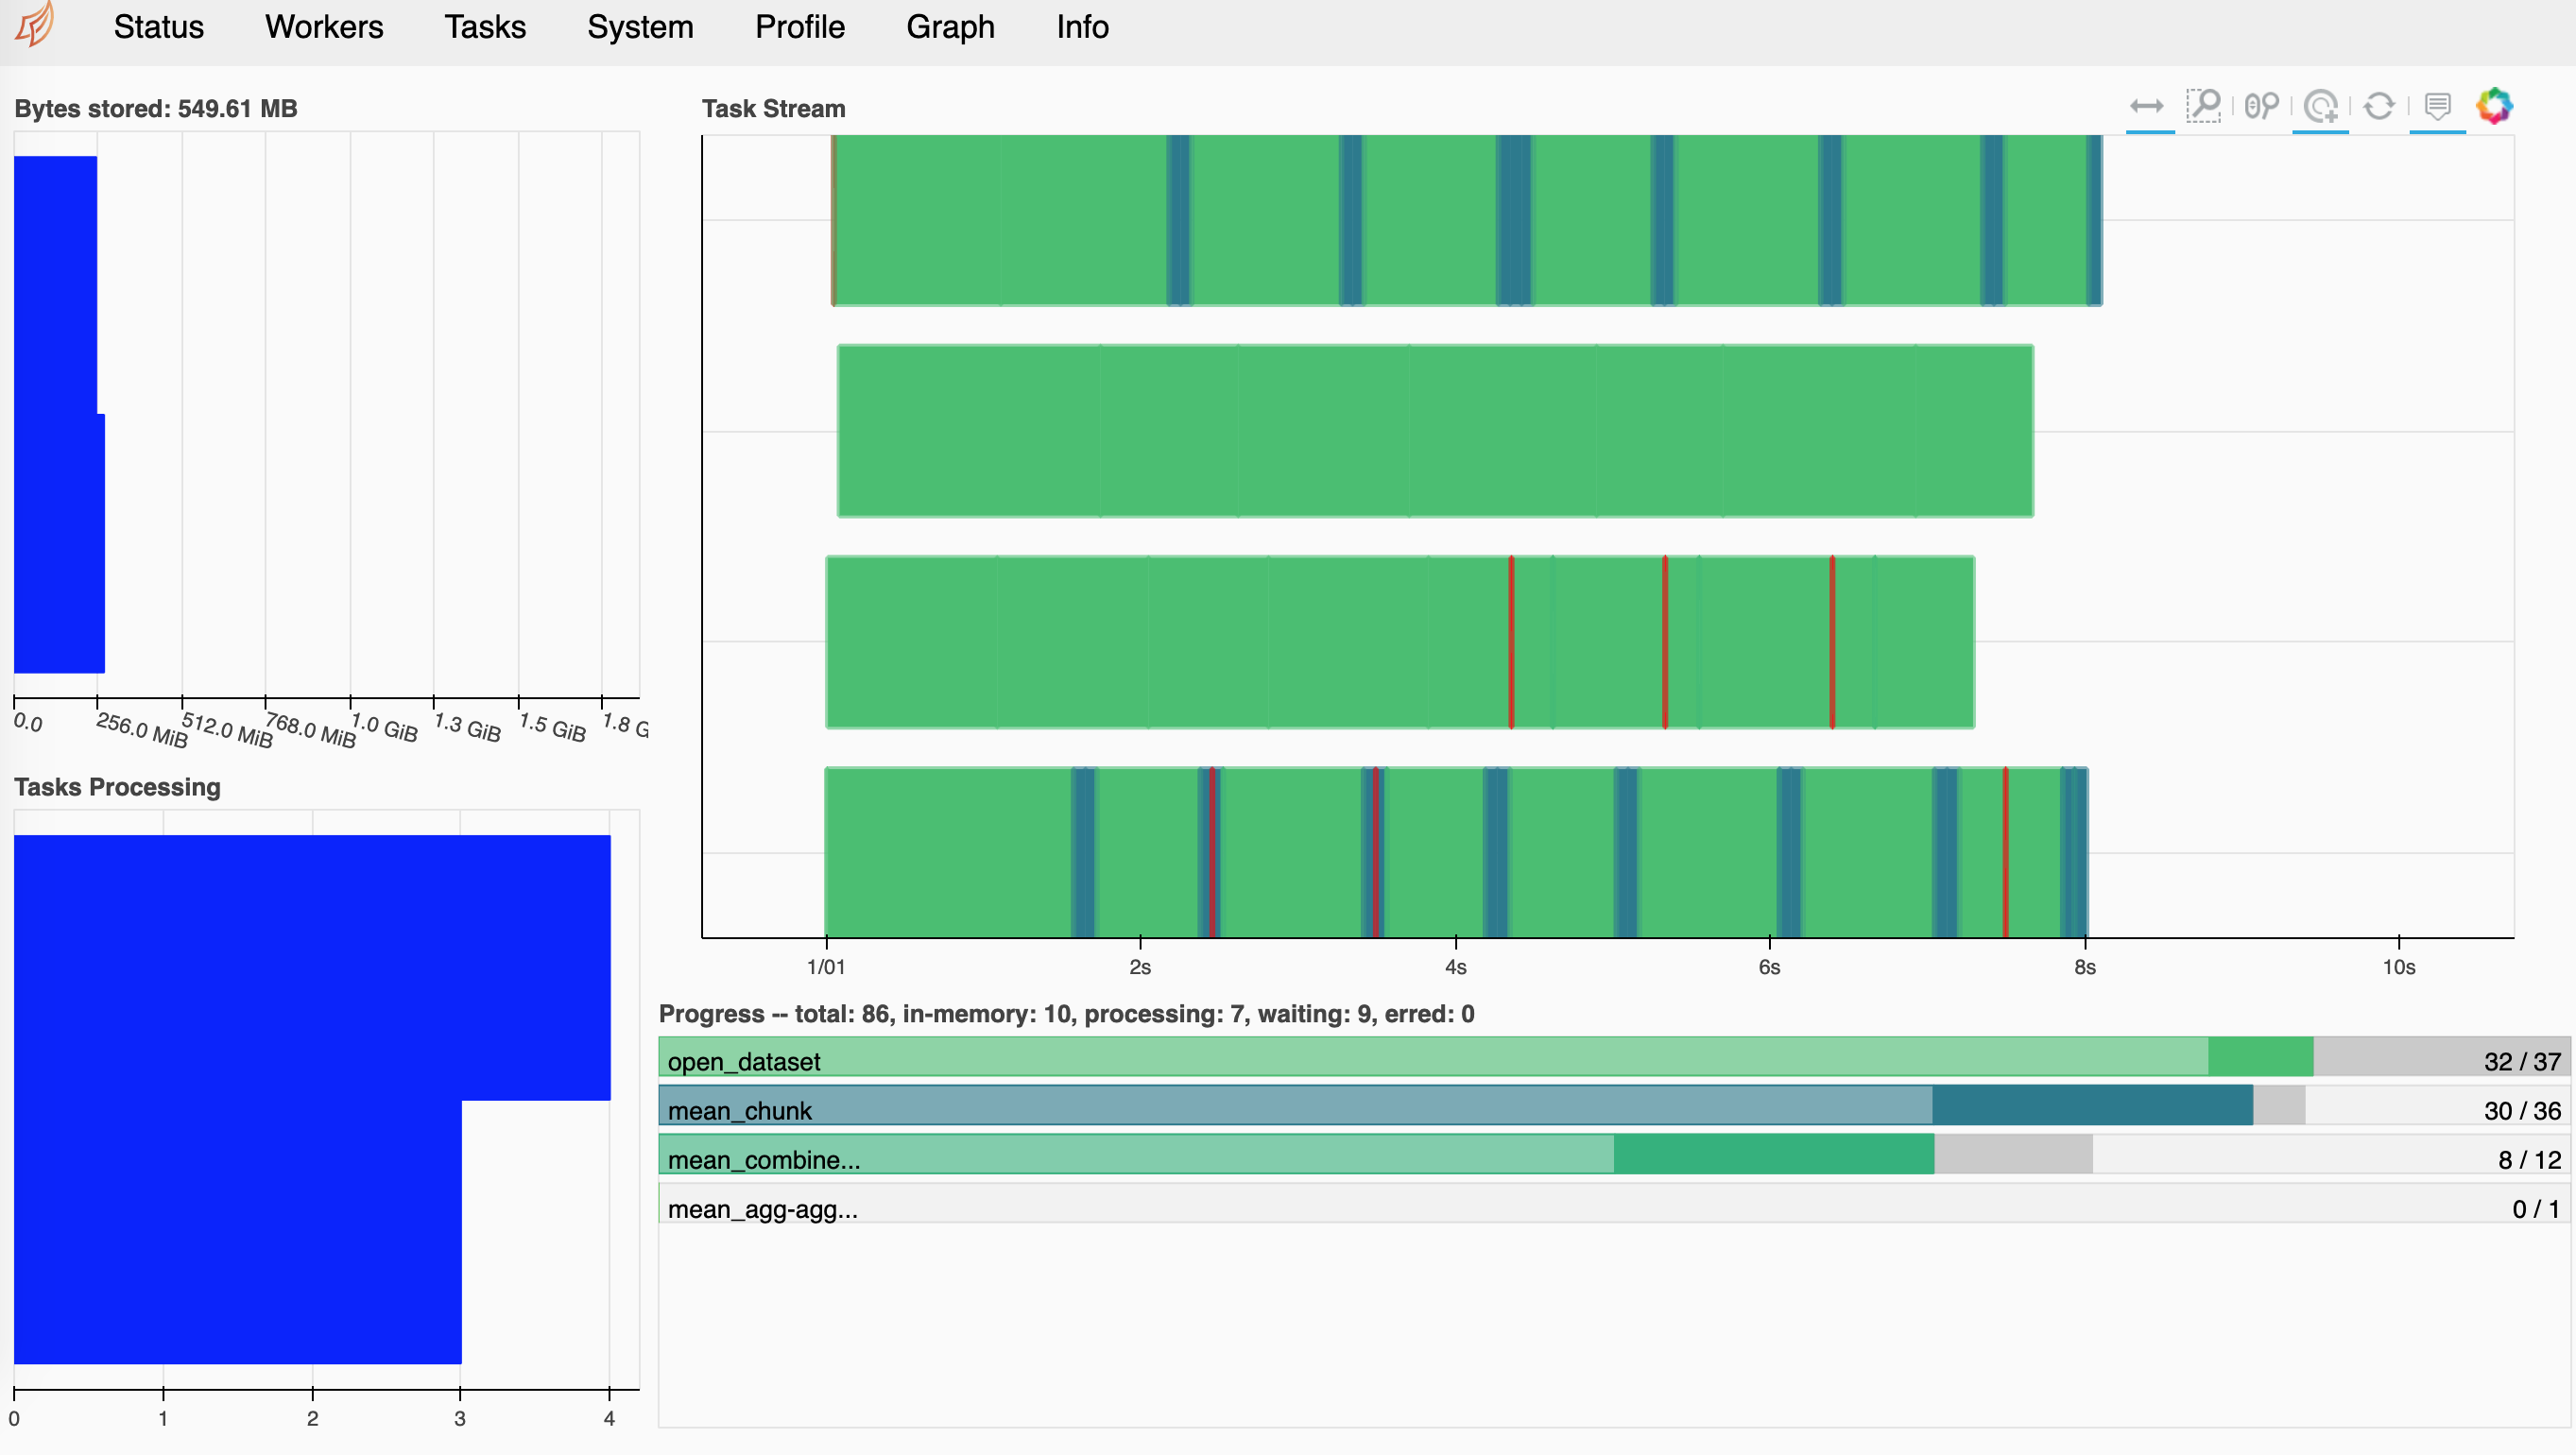



Any operations to the xarray dataset object, will use the distributed cluster from here on out, until it is stopped explicitly by the statement

In [37]:
client.shutdown()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
concurrent.futures._base.CancelledError


## Choosing a chunk size

Now that we have a basic idea of how dask enables parallel computation, it is important to revisit chunking. 

The choice of chunk sizes is crucial to getting your tasks to execute without running out of memory. Dask developers suggest the following considerations when choosing a chunk size: 

**1. A chunk should be small enough to fit comfortably in memory, but large enough that computations on that chunk take significantly longer than the 1ms overhead per task that Dask scheduling incurs.**

Typically, we have many chunks in memory at one instance, ranging anywhere between 10MB-1GB per chunk, depending on how much memory you have available, and the cost of each computation. 

**2. Chunks should align with the computation that you want to do.**

For example, if you want to vertically-average the temperature field, try to include all the vertical levels in each chunk. Otherwise, there is an additional cost of merging the results of computation from the two chunks. This is also true for vertical interpolation.

As an extreme example, let us say we want to perform a curve fit on the entire timeseries (0,999) of SST at one (lat,lon) point, and the chunk size is (time=1,z_t=61,nlat=400,nlon=600). Dask will try to load all 1000 chunks into a single worker, in order to try to compute the curve fit. Depending on the size of the dataset, dask and jupyterlab might run out of memory and crash.

**3. Chunks should align with your storage, if applicable.**

Array data formats are often chunked as well. When loading or saving data, if is useful to have Dask array chunks that are aligned with the chunking of your storage, often an even multiple times larger in each direction.



See https://docs.dask.org/en/latest/array-chunks.html for more details on specifying chunk sizes. 

## Dask performance report

To save an offline version of the performance dashboard. **Requires the distributed scheduler, and an active distibuted client object**. Doesn't save dynamic progress bars. 

In [10]:
from dask.distributed import performance_report
with performance_report(filename="mean_performance.html"):
    ds.SALT.mean().compute()

CPU times: user 3.44 s, sys: 252 ms, total: 3.69 s
Wall time: 1min 58s


## When is Dask not useful

**1. If your problem size fits easily in memory, and the computation time is acceptably low, consider using NumPy instead.**
     
      The overhead of using a Dask scheduler starts paying off for larger problems, but NumPy has better performance for smaller ones.
      
**2. If you just want better single-node performance for your python code, consider using Numba instead.**      

      Numba converts Python functions to optimized machine code at runtime, with speeds approaching C or FORTRAN. Numba also provides simplified threading, vectorization and GPU acceleration. You can also combine Numba with Dask for optimal performance.

**3. You do not want to deal with the nuances of lazy loading, chunking, task graphs, etc.**      
 
      Dask enables parallel computing for the simplest tasks automatically, but for complex algorithms, you do need to understand how dask graphs are scheduled, etc. Beginners to parallel programming might find MPI more straightforward than Dask. 

Read about some best practices for Dask: https://docs.dask.org/en/latest/array-best-practices.html